<a href="https://colab.research.google.com/github/BiancadeFrancisco/Regressoa_Linear_Aprovados2017/blob/main/RL_COM_SKLEARN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

O MINISTÉRIO DA EDUCAÇÃO SOLICITOU A VOCÊ UMA PREVISÃO DO PERCENTUAL DE ALUNOS QUE SERÃO APROVADOS NO ANO DE 2017, TENDO COMO BASE O ANO DE 2016. CRIE UM MODELO QUE CONSIGA PREVER O VALOR DE APROVAÇÃO EM 2016 COM BASE NAS APROVALÇOES DE 2015. FAÇA TODO O TRATAMENTO DE DADOS APRENDIDO E FAÇA A REGRESSÃO LINEAR COM SKLEARN, NORMALIZE A BASE DE DADOS E ANALISE AS MÉTRICAS DE R², MAE, MSE E RMSE DO MODELO.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
aprovacao = pd.read_excel('/content/C├│pia de aprovacao_alunos.xlsx')
aprovacao.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [ ]:
# INFORMAÇÕES SOBRE OS DADOS:

aprovacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [ ]:
# ESTATISTICAS SOBRE OS DADOS:

aprovacao.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [ ]:
# CORRELAÇÃO DOS DADOS

aprovacao.corr()

# ótima correlação das variáveis

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


<Axes: xlabel='ano_2015', ylabel='Count'>

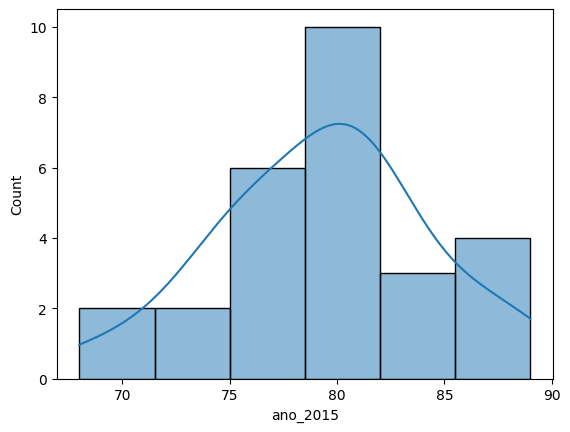

In [ ]:
# HISTOGRAMA COM LINHA DE NORMALIDADE, PARA VERIFICAR A DISTRIBUIÇÃO DOS DADOS DE 2015:

sns.histplot(aprovacao, x="ano_2015", kde=True)

# distribuição está normal

<Axes: xlabel='ano_2016', ylabel='Count'>

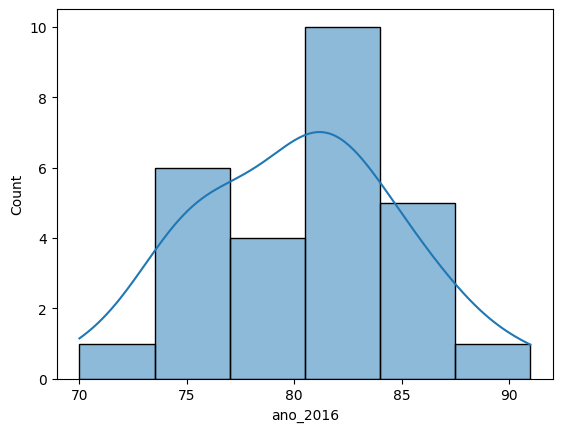

In [ ]:
# HISTOGRAMA COM LINHA DE NORMALIDADE, PARA VERIFICAR A DISTRIBUIÇÃO DOS DADOS DE 2016:

sns.histplot(aprovacao, x="ano_2016", kde=True)

# distribuição está normal

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

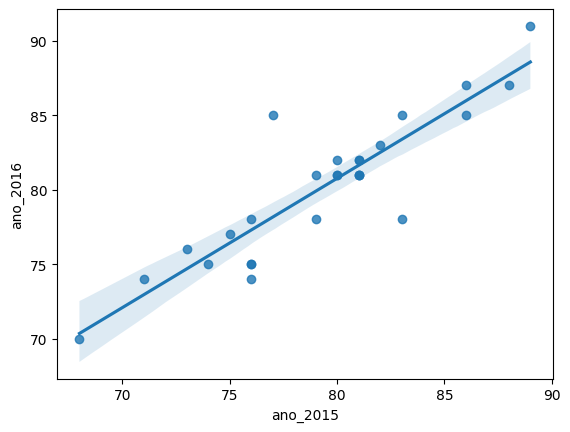

In [ ]:
# VERIFICAR EM GRÁFICO, COM RETA, A REGRESSÃO LINEAR DOS DADOS:

sns.regplot(x="ano_2015", y="ano_2016", data=aprovacao)



In [ ]:
# NESSE CASO NÃO PRECISO TRANSFORMAR OS DADOS PARA FICAREM NA MESMA ESCALA, POIS ESTÃO MUITO PRÓXIMOS, MAS FAREMOS PARA PADRONIZAR

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

aprovacao_normalizado = pd.DataFrame(scaler.fit_transform(aprovacao), index=aprovacao.index, columns=aprovacao.columns)

aprovacao_normalizado.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [ ]:
aprovacao_normalizado.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,0.539683,0.485009
std,0.236626,0.229530
min,0.000000,0.000000
25%,0.380952,0.309524
50%,0.571429,0.523810
75%,0.642857,0.595238
max,1.000000,1.000000


In [ ]:
import statsmodels.formula.api as smf

In [ ]:
function = "ano_2016~ano_2015"
model = smf.ols(formula=function, data=aprovacao_normalizado).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           3.02e-10
Time:                        15:15:22   Log-Likelihood:                 23.726
No. Observations:                  27   AIC:                            -43.45
Df Residuals:                      25   BIC:                            -40.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.051      0.324      0.7

In [ ]:
# INTERCEPT ALTO, TIRAR ELE:

function = "ano_2016~ano_2015 - 1"
model = smf.ols(formula=function, data=aprovacao_normalizado).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:               ano_2016   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              707.2
Date:                Wed, 12 Jul 2023   Prob (F-statistic):                    2.21e-20
Time:                        15:16:01   Log-Likelihood:                          23.670
No. Observations:                  27   AIC:                                     -45.34
Df Residuals:                      26   BIC:                                     -44.04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
# TREINAR O MODELO DE MACHINE LEARNING, COM TRAIN TEST SPLIT

x = aprovacao_normalizado[["ano_2015"]]

y = aprovacao_normalizado[["ano_2016"]]

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.20, random_state=42)
# 42 amostras aleatórias, 20% da minha amostra

lr = LinearRegression()

# TREINAR O TREINO

lr.fit(x_treino, y_treino)

LinearRegression()

LinearRegression()

In [ ]:
# MÉTRICAS DO MEU TREINO:
#R²

r_sq = lr.score(x_treino,y_treino)
print(r_sq)

0.8800910056640281


In [ ]:

y_pred_treino = lr.predict(x_treino)
print("MAE:", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE:", metrics.mean_squared_error(y_treino, y_pred_treino))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

# resultados de erro mto pequenos, pode-se levar em consideração que o r² estava alto desde o inicio

MAE: 0.06313092719197842
MSE: 0.006947385853516443
RMSE: 0.08335097991935334


In [ ]:
# TREINAR O TESTE

lr.fit(x_teste, y_teste)

LinearRegression()

LinearRegression()

In [ ]:
y_pred_teste = lr.predict(x_teste)
print("MAE:", metrics.mean_absolute_error(y_teste, y_pred_teste))
print("MSE:", metrics.mean_squared_error(y_teste, y_pred_teste))
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE: 0.08998515473335626
MSE: 0.014620503143970094
RMSE: 0.12091527258361573
